In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly

import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing



In [6]:
df = pd.read_csv('teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


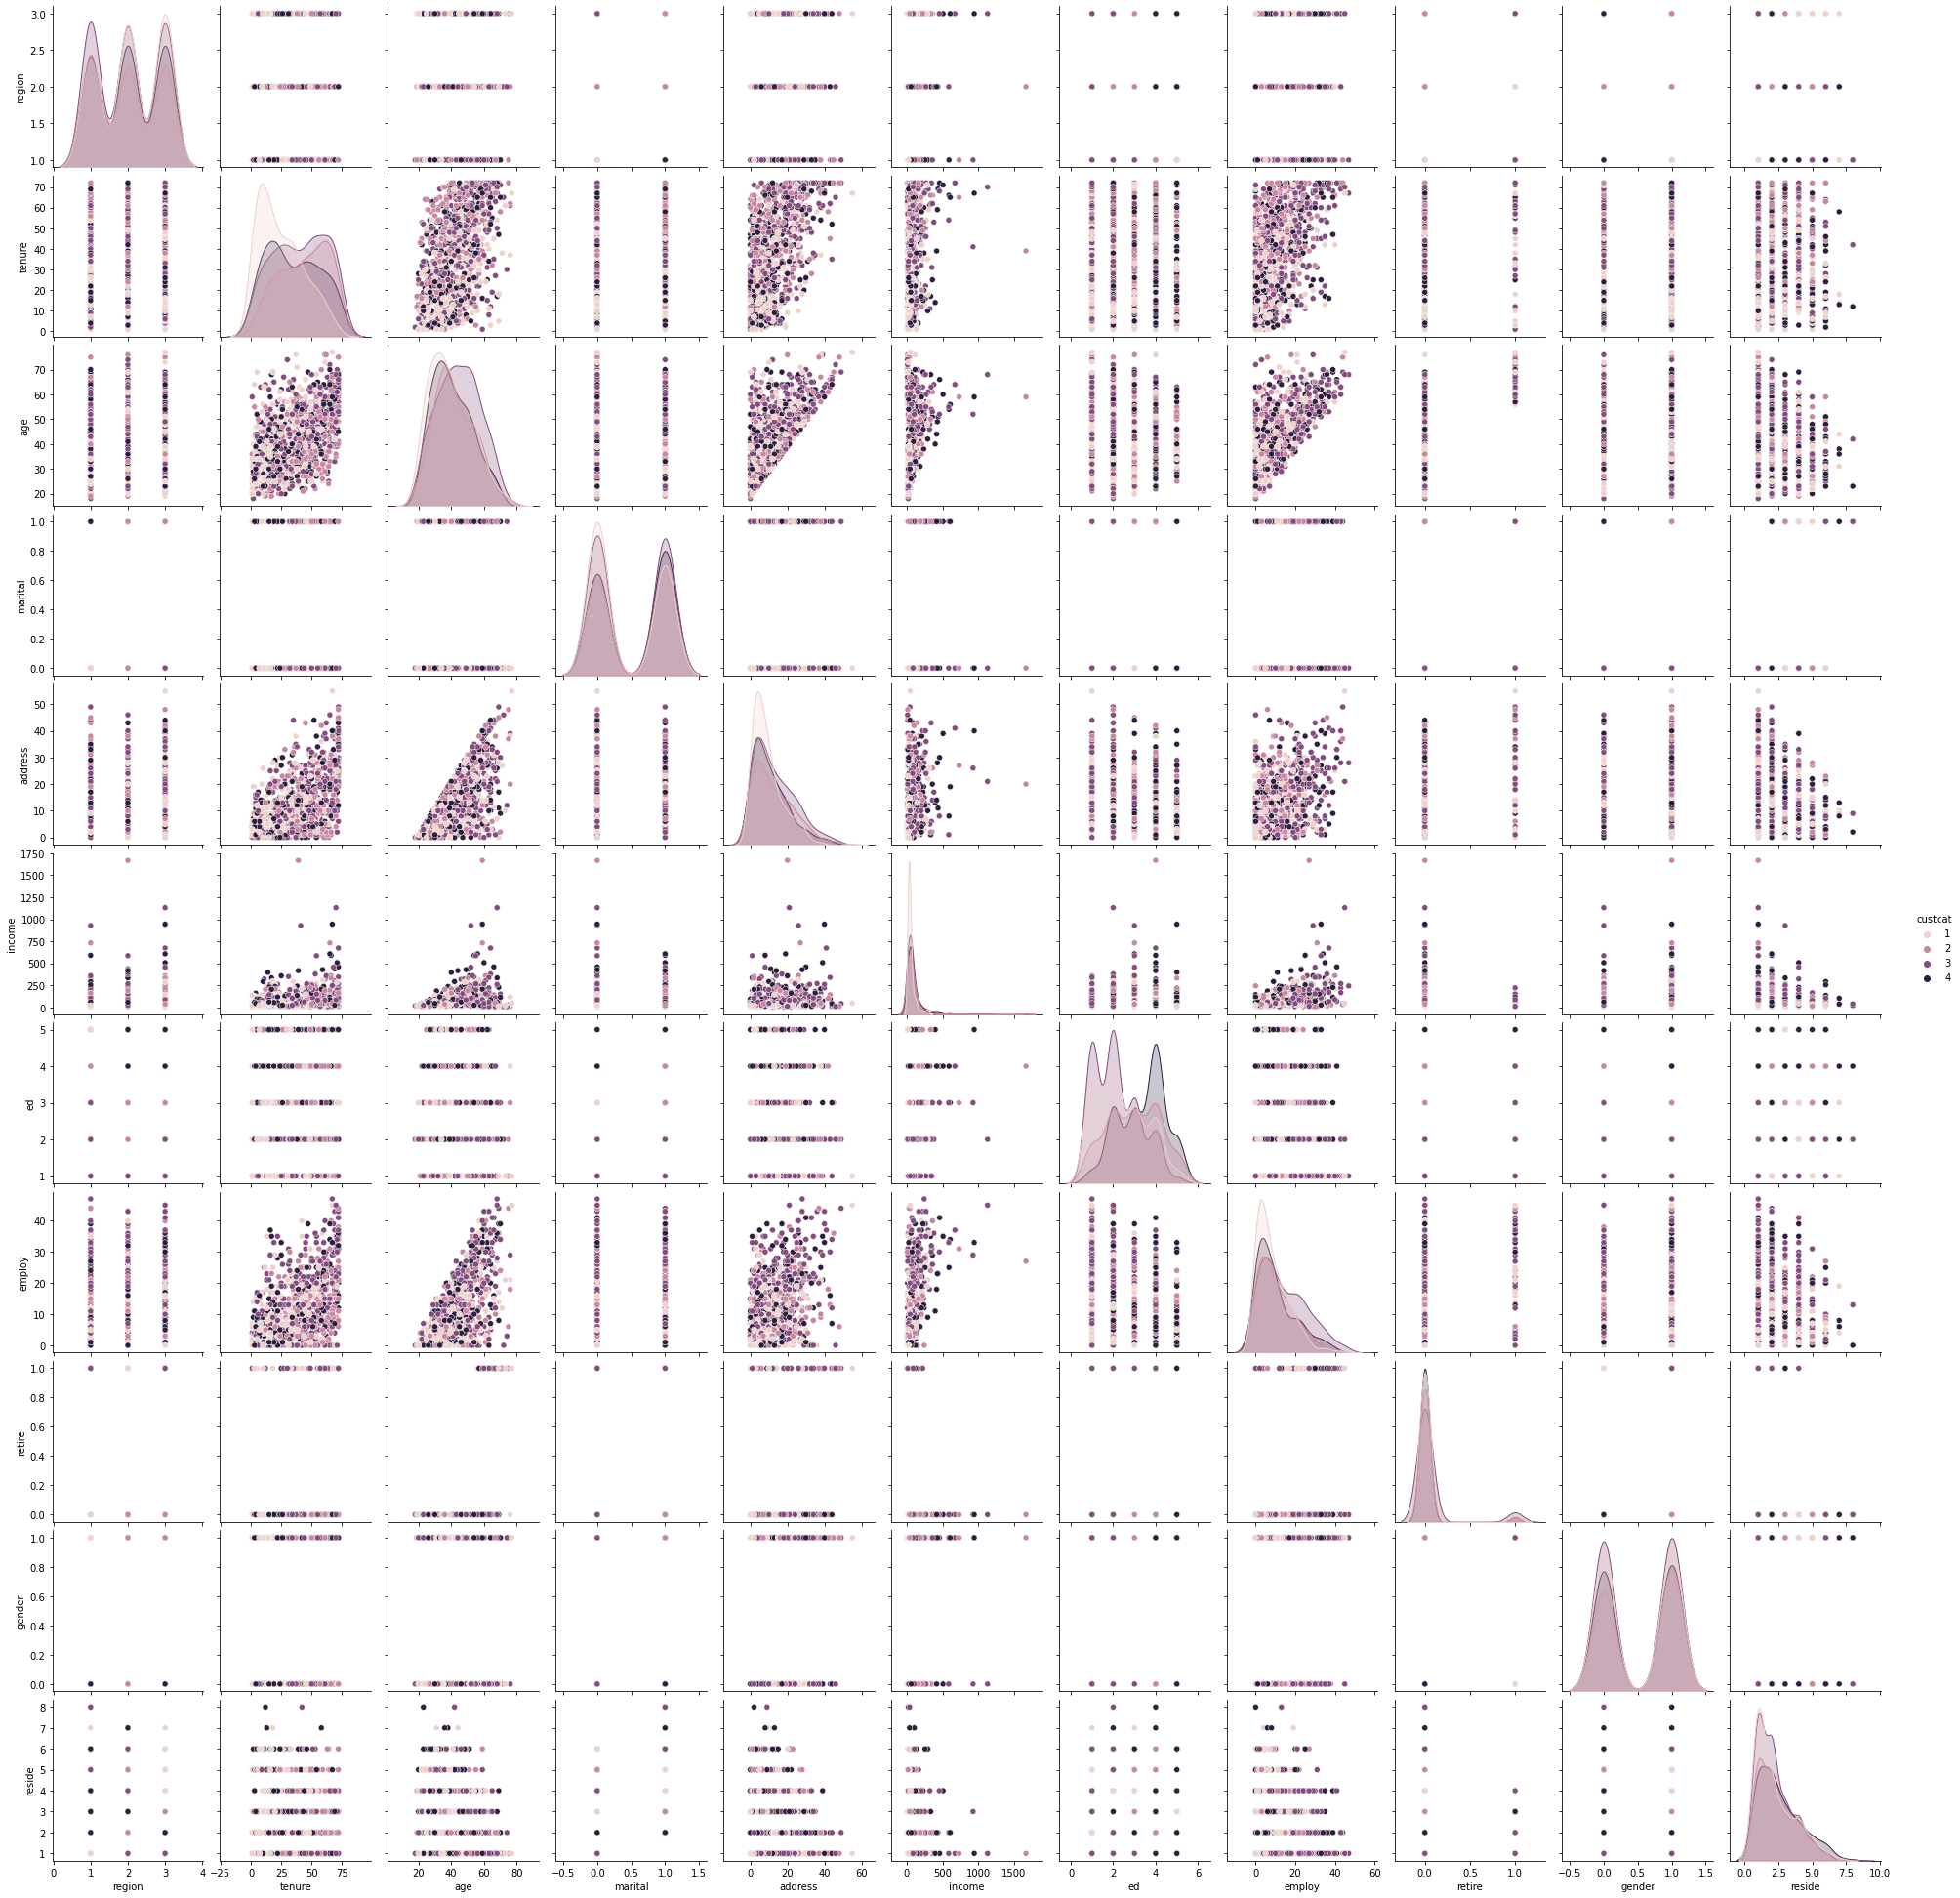

In [11]:

sns.pairplot(df, hue='custcat')

In [34]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,  64.,   4.,   5.,   0.,   2.],
       [  3.,  11.,  33.,   1., 136.,   5.,   5.,   0.,   6.],
       [  3.,  68.,  52.,   1., 116.,   1.,  29.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  33.,   2.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,  30.,   1.,   2.,   0.,   4.]])

In [35]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [36]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.12650641,
         1.0877526 , -0.5941226 , -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 ,  0.54644972,
         1.9062271 , -0.5941226 , -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  0.35951747,
        -1.36767088,  1.78752803,  0.96655883, -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 , -0.41625141,
        -0.54919639, -1.09029981,  0.96655883, -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.44429125,
        -1.36767088, -0.89182893, -1.03459817,  1.16300577]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (800, 9) (800,)
Set de Prueba: (200, 9) (200,)


In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
k = 8
#Entrenar el Modelo y Predecir  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

In [40]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 3, 2, 4])

In [41]:
from sklearn import metrics
print("Entrenar el set de Certeza: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Probar el set de Certeza: ", metrics.accuracy_score(y_test, yhat))

Entrenar el set de Certeza:  0.51375
Probar el set de Certeza:  0.34


In [43]:
def calculaK(k=8):
    #Entrenar el Modelo y Predecir  
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    print("k=", k)
    print("Entrenar el set de Certeza: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Probar el set de Certeza: ", metrics.accuracy_score(y_test, yhat))
    return[complex]


for i in range(1,50):
    calculaK(i)

k= 1
Entrenar el set de Certeza:  1.0
Probar el set de Certeza:  0.285
k= 2
Entrenar el set de Certeza:  0.62375
Probar el set de Certeza:  0.31
k= 3
Entrenar el set de Certeza:  0.575
Probar el set de Certeza:  0.305
k= 4
Entrenar el set de Certeza:  0.5575
Probar el set de Certeza:  0.305
k= 5
Entrenar el set de Certeza:  0.53125
Probar el set de Certeza:  0.355
k= 6
Entrenar el set de Certeza:  0.51
Probar el set de Certeza:  0.305
k= 7
Entrenar el set de Certeza:  0.53125
Probar el set de Certeza:  0.34
k= 8
Entrenar el set de Certeza:  0.51375
Probar el set de Certeza:  0.34
k= 9
Entrenar el set de Certeza:  0.51625
Probar el set de Certeza:  0.335
k= 10
Entrenar el set de Certeza:  0.5025
Probar el set de Certeza:  0.35
k= 11
Entrenar el set de Certeza:  0.49125
Probar el set de Certeza:  0.35
k= 12
Entrenar el set de Certeza:  0.48375
Probar el set de Certeza:  0.315
k= 13
Entrenar el set de Certeza:  0.47875
Probar el set de Certeza:  0.305
k= 14
Entrenar el set de Certeza:  0.